In [4]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
GammaTable = pd.read_hdf("../data/nexus/LPR_Tl208_Ports/NEXT100_Tl208_Port1a_GammaTables_4bar.h5", "MC/GammaTable")

display(GammaTable)

,event_id,x,y,z,energy,gamma_id,interaction,group,type,signal
0,5000,233.360535,227.949600,884.297852,1.713406,18,compt,17.0,RD,False
1,5000,363.532379,270.836853,844.990417,0.001182,6451,phot,17.0,eBrem,False
2,5000,332.215668,249.384842,861.691833,0.053159,11215,phot,4.0,eBrem,False
3,5000,451.249969,147.820541,977.412048,0.061882,44142,phot,11.0,eBrem,False
4,5000,465.109009,172.364365,1090.743652,0.029464,44162,phot,12.0,xray,False
...,...,...,...,...,...,...,...,...,...,...
1,5000041,-53.790909,190.275070,177.965225,0.021258,28230,phot,7.0,eBrem,False
0,5000042,59.775433,33.136982,531.138611,1.336214,28,compt,0.0,RD,False
1,5000042,60.151302,27.937996,489.591492,0.023551,24432,phot,0.0,eBrem,False
2,5000042,64.660126,-24.324728,535.782898,0.019912,29510,phot,5.0,eBrem,False


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_24099/755316514.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


(0.9, 2.8)

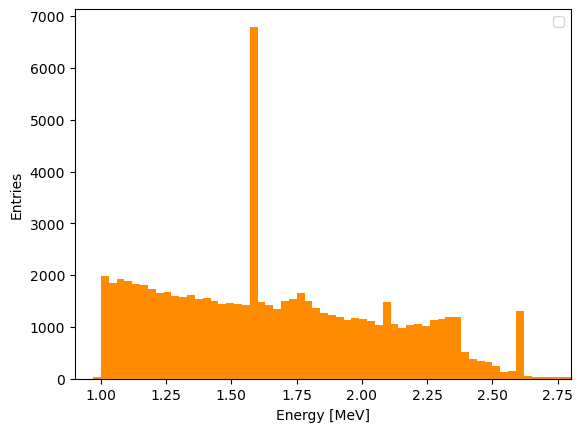

In [6]:
# Get the hit tables and plot the total energy deposited in the TPC
# Sum the energy of the hits and bin into a histogram
hit_tot_energy = GammaTable.groupby('event_id')['energy'].sum().reset_index(name='hit_tot_energy')

# Also merge this event energy into the main dataframe
# Merge the original DataFrame with the summed energy DataFrame based on 'event'
GammaTable_energy = pd.merge(GammaTable, hit_tot_energy, on='event_id')

plt.figure()

plt.hist(hit_tot_energy.hit_tot_energy, bins=np.arange(0.4, 3, 0.03), color=['darkorange']);

plt.legend()
plt.ylabel("Entries")
plt.xlabel("Energy [MeV]")
plt.xlim(0.9,2.8)

6850


,event_id,x,y,z,energy,gamma_id,interaction,group,type,signal,hit_tot_energy
6,5001,-149.471588,-268.685608,708.400757,1.592504,59,conv,3.0,RD,False,1.592504
19,5007,-32.289623,-130.398468,516.707092,1.592494,17,conv,9.0,RD,False,1.592494
48,5016,61.594624,-86.037666,715.432617,1.549623,20,conv,12.0,RD,False,1.591982
49,5016,60.537582,-132.705383,746.238464,0.003443,6402,phot,12.0,eBrem,False,1.591982
51,5016,32.403568,11.845713,678.883545,0.029505,48601,phot,8.0,xray,False,1.591982
...,...,...,...,...,...,...,...,...,...,...,...
276051,5000016,277.737000,116.441223,494.072845,1.592503,36,conv,9.0,RD,False,1.592503
276068,5000022,433.045959,163.411560,790.333008,1.592504,34,conv,0.0,RD,False,1.592504
276084,5000026,-127.312729,411.224884,645.754089,1.592494,26,conv,3.0,RD,False,1.592494
276086,5000028,182.233551,-24.048288,681.755615,1.588085,20,conv,13.0,RD,False,1.592262


['conv' 'phot' 'compt']
['RD' 'eBrem' 'xray' 'compt' 'annihil']


Text(0.5, 0, 'Energy [MeV]')

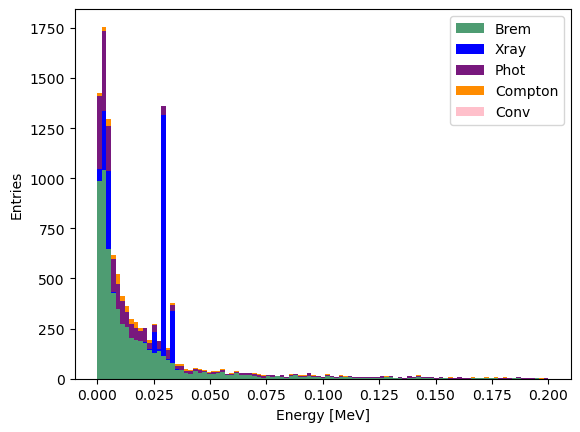

In [7]:
print(len(GammaTable_energy[ (GammaTable_energy.hit_tot_energy > 1.58) & (GammaTable_energy.hit_tot_energy < 1.61)  ].event_id.unique()))

Brems_DE = GammaTable_energy[ (GammaTable_energy.hit_tot_energy > 1.58) & (GammaTable_energy.hit_tot_energy < 1.61) &  (GammaTable_energy.signal == True)  ]
Other_DE = GammaTable_energy[ (GammaTable_energy.hit_tot_energy > 1.58) & (GammaTable_energy.hit_tot_energy < 1.61) &  (GammaTable_energy.signal == False)  ]

xrays_DE = Other_DE[Other_DE.type == "xray"]
compt_DE = Other_DE[ (Other_DE.type != "xray") &  (Other_DE.interaction == "compt")]
phot_DE = Other_DE[ (Other_DE.type != "xray") &  (Other_DE.interaction == "phot")]
conv_DE = Other_DE[ (Other_DE.type != "xray") &  (Other_DE.interaction == "conv")]

eBrem_DE_bkg = Other_DE[ (Other_DE.type != "xray") &  (Other_DE.interaction == "conv")]


display(Other_DE)
print(Other_DE.interaction.unique())
print(Other_DE.type.unique())

plt.figure()

# plt.hist(Brems_DE.energy, bins=np.linspace(0, 0.2, 100), color=['darkorange']);
plt.hist([Brems_DE.energy, xrays_DE.energy, phot_DE.energy, compt_DE.energy, conv_DE.energy ], bins=np.linspace(0, 0.2, 100), stacked=True, label=["Brem", "Xray", "Phot", "Compton", "Conv"], color=['#4e9c72', "Blue","#78187d", 'darkorange', 'Pink']);


plt.legend()
plt.ylabel("Entries")
plt.xlabel("Energy [MeV]")


,event_id,x,y,z,energy,gamma_id,interaction,group,type,signal,hit_tot_energy
37,5014,-38.805397,-327.783630,660.149292,2.475918,19,phot,13.0,RD,False,2.613397
112,5035,-139.182098,-390.577698,1407.895508,0.078574,6,phot,17.0,RD,False,2.621563
115,5035,151.771912,335.283478,832.093018,0.095430,62,phot,14.0,RD,False,2.621563
116,5035,-16.875763,-131.002411,879.098572,0.093289,55597,phot,6.0,eBrem,False,2.621563
146,10005,97.525314,-354.663544,682.460754,0.244340,27,phot,19.0,RD,False,2.612755
...,...,...,...,...,...,...,...,...,...,...,...
275019,4965014,-68.384415,477.530334,781.068970,0.283951,30,phot,15.0,RD,False,2.612208
275174,4970015,56.724617,-255.172119,842.847412,2.362158,41,phot,19.0,RD,False,2.612810
275568,4985018,45.819138,-32.773701,280.919312,2.155465,46,phot,25.0,RD,False,2.612221
276047,5000015,73.802872,211.021210,206.435898,0.303812,48,phot,16.0,RD,False,2.613654


['phot' 'compt' 'conv']
['RD' 'xray' 'eBrem' 'compt' 'annihil']


Text(0.5, 0, 'Energy [MeV]')

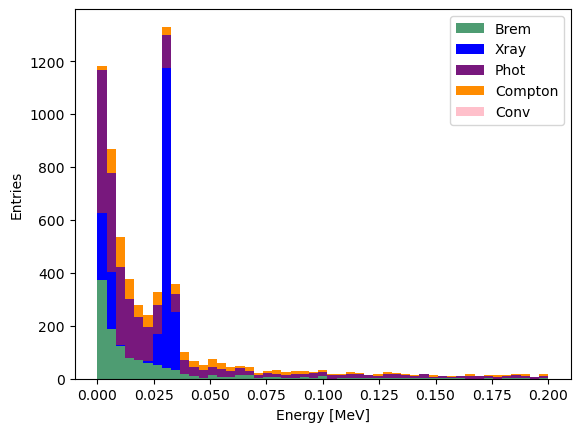

In [8]:
Brems_PP = GammaTable_energy[ (GammaTable_energy.hit_tot_energy > 2.6) & (GammaTable_energy.hit_tot_energy < 2.64) &  (GammaTable_energy.signal == True)  ]
Other_PP = GammaTable_energy[ (GammaTable_energy.hit_tot_energy > 2.6) & (GammaTable_energy.hit_tot_energy < 2.64) &  (GammaTable_energy.signal == False)  ]

xrays_PP = Other_PP[Other_PP.type == "xray"]
compt_PP = Other_PP[ (Other_PP.type != "xray") &  (Other_PP.interaction == "compt")]
phot_PP = Other_PP[ (Other_PP.type != "xray") &  (Other_PP.interaction == "phot")]
conv_PP = Other_PP[ (Other_PP.type != "xray") &  (Other_PP.interaction == "conv")]


display(phot_PP[phot_PP.energy > 0.075])
print(Other_PP.interaction.unique())
print(Other_PP.type.unique())


plt.figure()

# plt.hist(Brems_PP.energy, bins=np.linspace(0, 0.2, 100), color=['darkorange']);

plt.hist([Brems_PP.energy, xrays_PP.energy, phot_PP.energy, compt_PP.energy, conv_PP.energy], bins=np.linspace(0, 0.2, 50), stacked=True, label=["Brem", "Xray", "Phot", "Compton", "Conv"], color=['#4e9c72', "Blue","#78187d", 'darkorange', 'Pink']);




plt.legend()
plt.ylabel("Entries")
plt.xlabel("Energy [MeV]")


In [9]:
# Load in the gamma histories

GammaHistory = pd.read_hdf("../data/nexus/LPR_Tl208_Ports/NEXT100_Tl208_Port1a_GammaTables_4bar.h5", "MC/GammaHistory")




In [10]:

eventhist = GammaHistory[GammaHistory.event_id == 5515005]

eventTable = GammaTable[GammaTable.event_id == 5515005]

display(eventhist)
display(eventTable)


,event_id,group,tree,particle,particle_id,creator_proc,energy
0,5515005,0.0,0,gamma,26,RadioactiveDecay,2.614504e+00
1,5515005,0.0,1,Pb208[2614.522],5,RadioactiveDecay,8.779753e-07
2,5515005,0.0,2,Pb208[3197.711],2,RadioactiveDecay,1.986045e-07
3,5515005,0.0,3,Pb208[3475.078],1,RadioactiveDecay,6.160961e-06
4,5515005,0.0,4,Tl208,0,none,0.000000e+00
5,5515005,4.0,0,gamma,45,eBrem,1.335140e-01
6,5515005,4.0,1,e+,43,conv,1.169170e+00
7,5515005,4.0,2,gamma,26,RadioactiveDecay,2.614504e+00
8,5515005,4.0,3,Pb208[2614.522],5,RadioactiveDecay,8.779753e-07
9,5515005,4.0,4,Pb208[3197.711],2,RadioactiveDecay,1.986045e-07


,event_id,x,y,z,energy,gamma_id,interaction,group,type,signal
0,5515005,95.345352,342.748718,893.758423,1.441800,43,conv,0.0,RD,False
1,5515005,0.148232,344.433655,1001.268616,0.033917,4419,compt,4.0,eBrem,True
2,5515005,-40.512501,250.556427,954.375122,0.069785,4419,phot,1.0,eBrem,True
3,5515005,-48.455971,191.328262,1020.806030,0.029298,4436,phot,2.0,xray,False
4,5515005,146.814178,362.383942,755.273315,0.017087,66749,phot,11.0,eBrem,True


38066


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_24099/3212732774.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


(0.9, 2.8)

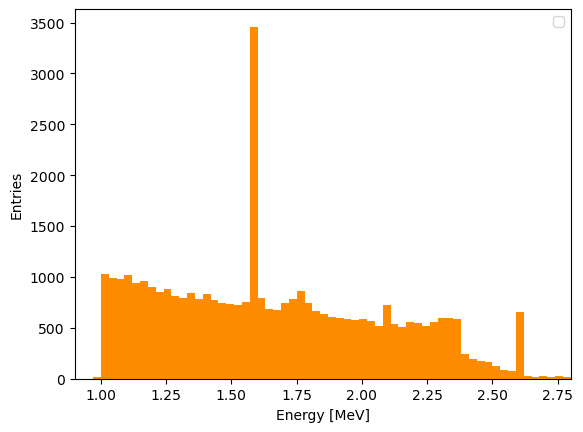

In [16]:
# Load in Penelope Model 
GammaTable_Penelope = pd.read_hdf("../data/nexus/LPR_Tl208_Ports/NEXT100_Tl208_Port1a_GammaTables_4bar_Penelope.h5", "MC/GammaTable")

print(len(GammaTable_Penelope.event_id.unique()))


# Get the hit tables and plot the total energy deposited in the TPC
# Sum the energy of the hits and bin into a histogram
hit_tot_energy_Penelope = GammaTable_Penelope.groupby('event_id')['energy'].sum().reset_index(name='hit_tot_energy')

# Also merge this event energy into the main dataframe
# Merge the original DataFrame with the summed energy DataFrame based on 'event'
GammaTable_energy_Penelope = pd.merge(GammaTable_Penelope, hit_tot_energy_Penelope, on='event_id')

plt.figure()

plt.hist(hit_tot_energy_Penelope.hit_tot_energy, bins=np.arange(0.4, 3, 0.03), color=['darkorange']);

plt.legend()
plt.ylabel("Entries")
plt.xlabel("Energy [MeV]")
plt.xlim(0.9,2.8)


1.8736700683964824


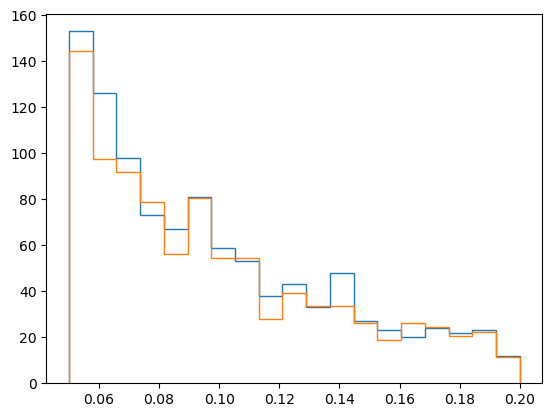

In [30]:
plt.figure()

scale_factor = len(GammaTable_energy)/len(GammaTable_energy_Penelope)
print(scale_factor)

GammaTable_energy_Penelope_DE = GammaTable_energy_Penelope[
    (GammaTable_energy_Penelope.hit_tot_energy > 1.58) &
    (GammaTable_energy_Penelope.hit_tot_energy < 1.61)
].energy


plt.hist(GammaTable_energy[ (GammaTable_energy.hit_tot_energy > 1.58) & (GammaTable_energy.hit_tot_energy < 1.61)  ].energy,bins=np.linspace(0.05, 0.2, 20), histtype = "step");
plt.hist(GammaTable_energy_Penelope_DE,bins=np.linspace(0.05, 0.2, 20), histtype = "step", weights=np.full_like(GammaTable_energy_Penelope_DE, scale_factor));
